# Task 3: Building an SVM classifier

<br><br>

#### For this task we will create a Support Vector Machine to classify the authenticity of the bank note dataset from the prevous task.

 1) Load appropriate packages
 
 2) Load the bank note dataset from the previous task into a a pandas dataframe
 
 3) Define features and target in your data
 
 4) Plot a scatter plot of two of your features coloured by the target column
 
 5) Split your data in a test and train sets
 
 6) Train and predict on your classifier
 
 7) Print an evaluation report for you prediction and evaluate the performance of your classifier
 

---
Create dataset:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/data_banknote_authentication.csv')
df['Class']=df['Class'].replace(0, "Authentic")
df['Class']=df['Class'].replace(1, "Fake")

In [3]:
df.head()

Variance of Wavelet Transformed image  \
0                                3.62160   
1                                4.54590   
2                                3.86600   
3                                3.45660   
4                                0.32924   

   Skewness of Wavelet Transformed image  \
0                                 8.6661   
1                                 8.1674   
2                                -2.6383   
3                                 9.5228   
4                                -4.4552   

   Kurtosis of Wavelet Transformed image  Entropy of image      Class  
0                                -2.8073          -0.44699  Authentic  
1                                -2.4586          -1.46210  Authentic  
2                                 1.9242           0.10645  Authentic  
3                                -4.0112          -3.59440  Authentic  
4                                 4.5718          -0.98880  Authentic

---
Define features and target:

In [4]:
features = df.columns[:-1]
print(features)

Index(['Variance of Wavelet Transformed image',
       'Skewness of Wavelet Transformed image',
       'Kurtosis of Wavelet Transformed image', 'Entropy of image'],
      dtype='object')


In [5]:
target ='Class'

---
Plot features coloured by target:

In [6]:
import seaborn as sns

In [7]:
data=df[features]
data.head()


Variance of Wavelet Transformed image  \
0                                3.62160   
1                                4.54590   
2                                3.86600   
3                                3.45660   
4                                0.32924   

   Skewness of Wavelet Transformed image  \
0                                 8.6661   
1                                 8.1674   
2                                -2.6383   
3                                 9.5228   
4                                -4.4552   

   Kurtosis of Wavelet Transformed image  Entropy of image  
0                                -2.8073          -0.44699  
1                                -2.4586          -1.46210  
2                                 1.9242           0.10645  
3                                -4.0112          -3.59440  
4                                 4.5718          -0.98880

C:\Users\brucech\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


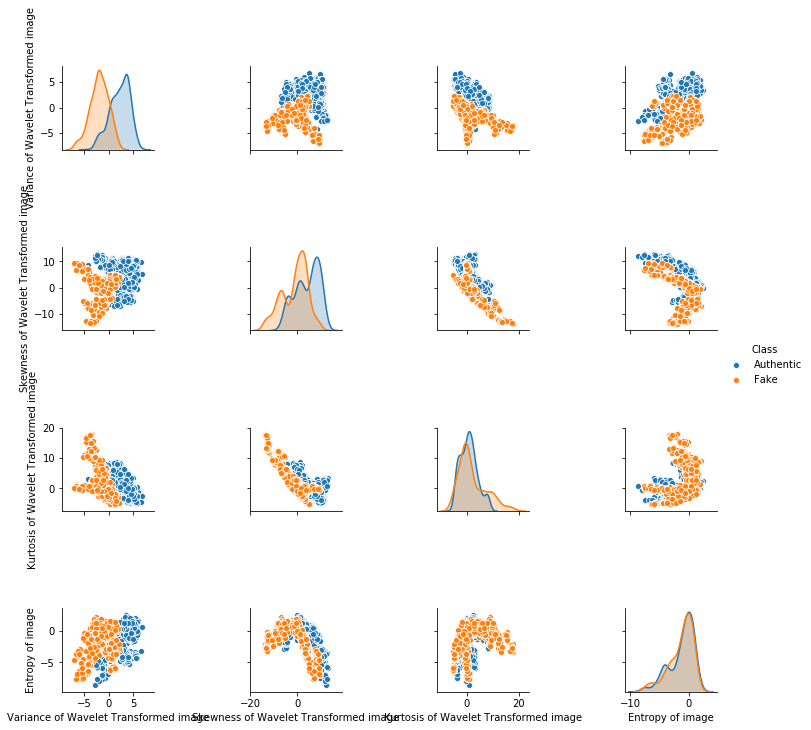

In [8]:
sns.pairplot(df,hue=target)

---
Create a support vector machine and split your dataset in train and test portions:

In [9]:
from sklearn import svm

In [10]:
svc = svm.SVC(gamma='scale')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=0)

---
Fit your support vector machine to your test data:

In [13]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

---
Predict the authenticity of a bank note and print the classification report:

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

   Authentic       1.00      1.00      1.00       232
        Fake       0.99      1.00      1.00       180

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



### Easy peasy!